{{0, 0, 73, 0, 0, 0, 0, 0, 79, 34}, {0, 0, 15, 41, 0, 0, 0, 0, 42, 98}, 
 
>   {73, 15, 0, 57, 30, 0, 10, 0, 0, 0}, {0, 41, 57, 0, 20, 46, 0, 0, 0, 0}, 
 
>   {0, 0, 30, 20, 0, 53, 0, 0, 0, 0}, {0, 0, 0, 46, 53, 0, 21, 30, 0, 0}, 
 
>   {0, 0, 10, 0, 0, 21, 0, 72, 76, 0}, {0, 0, 0, 0, 0, 30, 72, 0, 60, 77}, 
 
>   {79, 42, 0, 0, 0, 0, 76, 60, 0, 72}, {34, 98, 0, 0, 0, 0, 0, 77, 72, 0}}
{384, {1, 10, 8, 6, 7, 3, 5, 4, 2, 9, 1}}
Graph[<10>, <20>]
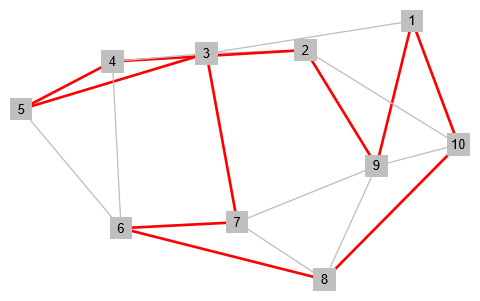

In [1]:
g = RandomGraph[WattsStrogatzGraphDistribution[10, 0.2]];
edges = EdgeList[g];
weight = RandomInteger[{10, 100}, Length[edges]];
graph = Graph[g, EdgeWeight -> weight, PlotTheme -> "ClassicDiagram"];

matrix = Normal[WeightedAdjacencyMatrix[graph]]

p = FindShortestTour[graph]

path = UndirectedEdge @@@ Partition[Append[p[[2]], First[p[[2]]]], 2, 1];
HighlightGraph[
  graph,
  Style[path, Red, Thick]
]
nodes = VertexList[graph];
cases = Table[{}, {Length[nodes]}];

In [17]:
permutation[graph_] := Module[{cycle, node, list, list1, n, added, position},
  cycle = {nodes[[1]]};
  For[i = 1, i <= Length[nodes], i++,
    node = cycle[[i]];
    list = matrix[[node]];
    list1 = Sort[Select[list, # != 0 &]];
    n = Length[list1];
    added = False;
    For[j = 1, j <= n && !added, j++,
      position = First[FirstPosition[list, list1[[j]]]];
      If[FreeQ[cycle, position] && FreeQ[cases[[j]], position],
        cycle = AppendTo[cycle, position];
        added = True
      ];
    ];
    If[!added, i = Length[nodes] + 1]
  ];
  cycle
]

weightPath[cycle_] := Sum[matrix[[cycle[[i]], cycle[[i + 1]]]], {i, Length[cycle] - 1}];

In [19]:
permutation[graph]

{1, 10, 9, 2, 3, 7, 6, 8}

In [21]:
Length[permutation[graph]] != Length[nodes]
!EdgeQ[graph, 8 <-> nodes[[1]]]

True
True

In [ ]:
pav[graph_] := Module[{list, n, cycle, tsp},
  list = permutation[graph];
  n = Length[list];
  
  While[!EdgeQ[graph, list[[-1]] <-> nodes[[1]]] || n != Length[nodes],
    cases = ReplacePart[cases, n -> Append[cases[[n]], list[[-1]]]];
    cases = ReplacePart[cases, n + 1 ->  {}];
    list = permutation[graph];
  ];

  cycle = Join[list , {nodes[[1]]}];
  tsp = {weightPath[cycle], cycle}
]

In [ ]:
tsp = pav[graph]
path = UndirectedEdge @@@ Partition[Append[tsp[[2]], First[tsp[[2]]]], 2, 1];
HighlightGraph[
  graph,
  Style[path, Red, Thick]
]